In [4]:
#Load the Data
import pandas as pd

# Load the CSV files
users_df = pd.read_csv('C:/Data/Ramya Career/Resume/InterviewPrep/FETCH/USER.csv')
products_df = pd.read_csv('C:/Data/Ramya Career/Resume/InterviewPrep/FETCH/PRODUCTS.csv')
transactions_df = pd.read_csv('C:/Data/Ramya Career/Resume/InterviewPrep/FETCH/TRANSACTION.csv')



In [6]:
# Standardize column names based on the ER diagram
users_df.columns = ['id', 'created_date', 'birth_date', 'state', 'language', 'gender']
products_df.columns = ['category_1', 'category_2', 'category_3', 'category_4', 'manufacturer', 'brand', 'barcode']
transactions_df.columns = ['receipt_id', 'purchase_date', 'scan_date', 'store_name', 'user_id', 'barcode', 'quantity', 'sale']

In [8]:
#Preliminary Exploration
#Use basic functions to explore the structure and initial quality of the data.

# Display the first few rows of each DataFrame
print("Users DataFrame Sample:")
print(users_df.head())

print("\nProducts DataFrame Sample:")
print(products_df.head())

print("\nTransactions DataFrame Sample:")
print(transactions_df.head())

# Get summary information for each DataFrame
print("\nUsers DataFrame Info:")
print(users_df.info())

print("\nProducts DataFrame Info:")
print(products_df.info())

print("\nTransactions DataFrame Info:")
print(transactions_df.info())


Users DataFrame Sample:
                         id               created_date  \
0  5ef3b4f17053ab141787697d  2020-06-24 20:17:54.000 Z   
1  5ff220d383fcfc12622b96bc  2021-01-03 19:53:55.000 Z   
2  6477950aa55bb77a0e27ee10  2023-05-31 18:42:18.000 Z   
3  658a306e99b40f103b63ccf8  2023-12-26 01:46:22.000 Z   
4  653cf5d6a225ea102b7ecdc2  2023-10-28 11:51:50.000 Z   

                  birth_date state language  gender  
0  2000-08-11 00:00:00.000 Z    CA   es-419  female  
1  2001-09-24 04:00:00.000 Z    PA       en  female  
2  1994-10-28 00:00:00.000 Z    FL   es-419  female  
3                        NaN    NC       en     NaN  
4  1972-03-19 00:00:00.000 Z    PA       en  female  

Products DataFrame Sample:
          category_1              category_2                   category_3  \
0  Health & Wellness           Sexual Health  Conductivity Gels & Lotions   
1             Snacks           Puffed Snacks         Cheese Curls & Puffs   
2  Health & Wellness               Hair Care

In [10]:
# Check for Total # of records & Missing Values

# Total number of rows for each dataset
users_row_count = users_df.shape[0]
products_row_count = products_df.shape[0]
transactions_row_count = transactions_df.shape[0]

# Checking for missing values in each DataFrame
users_missing_values = users_df.isna().sum()
products_missing_values = products_df.isna().sum()
transactions_missing_values = transactions_df.isna().sum()

# Displaying the results
print(f"Total Rows in Users DataFrame: {users_row_count}")
print("Missing values in Users DataFrame:")
print(users_missing_values)

print(f"\nTotal Rows in Products DataFrame: {products_row_count}")
print("Missing values in Products DataFrame:")
print(products_missing_values)

print(f"\nTotal Rows in Transactions DataFrame: {transactions_row_count}")
print("Missing values in Transactions DataFrame:")
print(transactions_missing_values)

Total Rows in Users DataFrame: 100000
Missing values in Users DataFrame:
id                  0
created_date        0
birth_date       3675
state            4812
language        30508
gender           5892
dtype: int64

Total Rows in Products DataFrame: 845552
Missing values in Products DataFrame:
category_1         111
category_2        1424
category_3       60566
category_4      778093
manufacturer    226474
brand           226472
barcode           4025
dtype: int64

Total Rows in Transactions DataFrame: 50000
Missing values in Transactions DataFrame:
receipt_id          0
purchase_date       0
scan_date           0
store_name          0
user_id             0
barcode          5762
quantity            0
sale                0
dtype: int64


In [12]:
# Check for Duplicates
# Check for duplicate rows
print("Duplicate rows in Users DataFrame:", users_df.duplicated().sum())
print("Duplicate rows in Products DataFrame:", products_df.duplicated().sum())
print("Duplicate rows in Transactions DataFrame:", transactions_df.duplicated().sum())

Duplicate rows in Users DataFrame: 0
Duplicate rows in Products DataFrame: 215
Duplicate rows in Transactions DataFrame: 171


In [14]:
# Data Type Validation
# Check data types for each DataFrame
print("Data types in Users DataFrame:")
print(users_df.dtypes)

print("\nData types in Products DataFrame:")
print(products_df.dtypes)

print("\nData types in Transactions DataFrame:")
print(transactions_df.dtypes)


Data types in Users DataFrame:
id              object
created_date    object
birth_date      object
state           object
language        object
gender          object
dtype: object

Data types in Products DataFrame:
category_1       object
category_2       object
category_3       object
category_4       object
manufacturer     object
brand            object
barcode         float64
dtype: object

Data types in Transactions DataFrame:
receipt_id        object
purchase_date     object
scan_date         object
store_name        object
user_id           object
barcode          float64
quantity          object
sale              object
dtype: object


In [14]:
#Data Type Validation
#Ensure the columns are in the correct data types as per the ER diagram, and convert them if necessary.
# Convert dates to datetime format
users_df['created_date'] = pd.to_datetime(users_df['created_date'], errors='coerce')
users_df['birth_date'] = pd.to_datetime(users_df['birth_date'], errors='coerce')
transactions_df['purchase_date'] = pd.to_datetime(transactions_df['purchase_date'], errors='coerce')
transactions_df['scan_date'] = pd.to_datetime(transactions_df['scan_date'], errors='coerce')

# Convert numeric fields
# Replace specific terms like 'zero' with 0 before conversion
transactions_df['quantity'] = transactions_df['quantity'].replace({'zero': '0'})
transactions_df['quantity'] = pd.to_numeric(transactions_df['quantity'], errors='coerce')
transactions_df['sale'] = pd.to_numeric(transactions_df['sale'], errors='coerce')


In [16]:
# Summary statistics to identify outliers
print("Summary Statistics for Users Data:")
print(users_df.describe(include='all'), "\n")

print("Summary Statistics for Transactions Data:")
print(transactions_df.describe(include='all'), "\n")

print("Summary Statistics for Products Data:")
print(products_df.describe(include='all'), "\n")

Summary Statistics for Users Data:
                              id               created_date  \
count                     100000                     100000   
unique                    100000                      99942   
top     5ef3b4f17053ab141787697d  2023-01-12 18:30:15.000 Z   
freq                           1                          2   

                       birth_date  state language  gender  
count                       96325  95188    69492   94108  
unique                      54721     52        2      11  
top     1970-01-01 00:00:00.000 Z     TX       en  female  
freq                         1272   9028    63403   64240   

Summary Statistics for Transactions Data:
                                  receipt_id purchase_date  \
count                                  50000         50000   
unique                                 24440            89   
top     bedac253-2256-461b-96af-267748e6cecf    2024-06-15   
freq                                      12           77

In [16]:
# Foreign Key Consistency
#Verify that all foreign keys in transactions match the primary keys in users and products
# Check if all user_ids in transactions exist in users
missing_users = transactions_df[~transactions_df['user_id'].isin(users_df['id'])]
print("Transactions with missing user information:", len(missing_users))

# Check if all barcodes in transactions exist in products
missing_products = transactions_df[~transactions_df['barcode'].isin(products_df['barcode'])]
print("Transactions with missing product information:", len(missing_products))


Transactions with missing user information: 49738
Transactions with missing product information: 19408


In [18]:
# Check for invalid quantities
invalid_quantities = transactions_df[transactions_df['quantity'] <= 0]
print("Transactions with invalid quantities:", len(invalid_quantities))

# Check for future purchase dates
future_dates = transactions_df[transactions_df['purchase_date'] > pd.Timestamp.now()]
print("Transactions with future purchase dates:", len(future_dates))


Transactions with invalid quantities: 12500
Transactions with future purchase dates: 0


In [20]:
# Calculate the number of unique user IDs in users and transactions DataFrames
unique_users_in_users = users_df['id'].nunique()
unique_users_in_transactions = transactions_df['user_id'].nunique()

print("Unique user IDs in users table:", unique_users_in_users)
print("Unique user IDs in transactions table:", unique_users_in_transactions)


Unique user IDs in users table: 100000
Unique user IDs in transactions table: 17694


Total Rows in Users DataFrame: 100000
Missing values in Users DataFrame:
id                  0
created_date        0
birth_date       3675
state            4812
language        30508
gender           5892
dtype: int64
Missing % in Users DataFrame:
id               0.000
created_date     0.000
birth_date       3.675
state            4.812
language        30.508
gender           5.892
dtype: float64

Total Rows in Transactions DataFrame: 50000
Missing values in Transactions DataFrame:
receipt_id           0
purchase_date        0
scan_date            0
store_name           0
user_id              0
barcode           5762
quantity             0
sale             12500
dtype: int64
Missing % in Transactions DataFrame:
receipt_id        0.000
purchase_date     0.000
scan_date         0.000
store_name        0.000
user_id           0.000
barcode          11.524
quantity          0.000
sale             25.000
dtype: float64

Total Rows in Products DataFrame: 845552
Missing values in Products Da

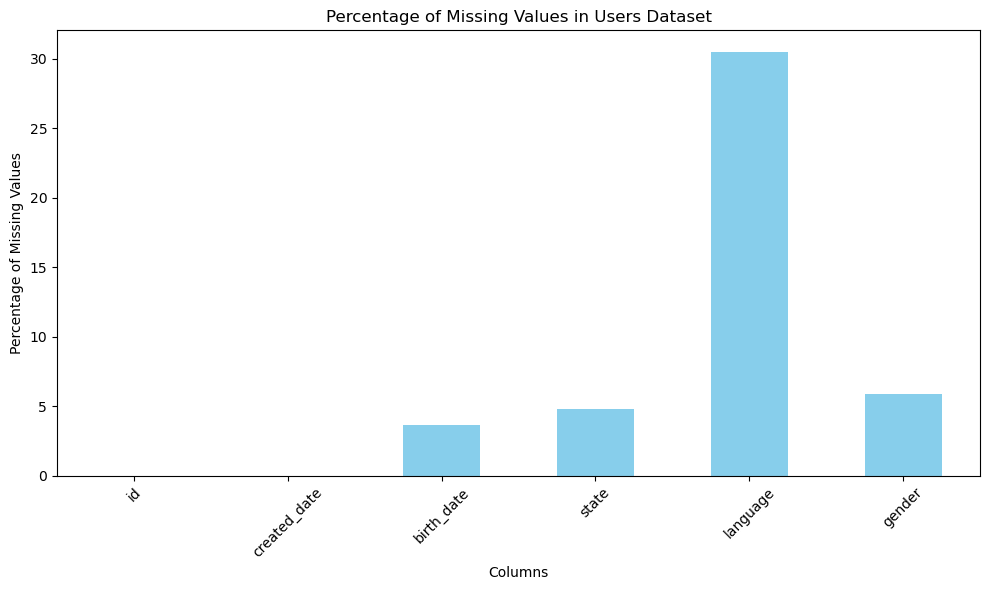

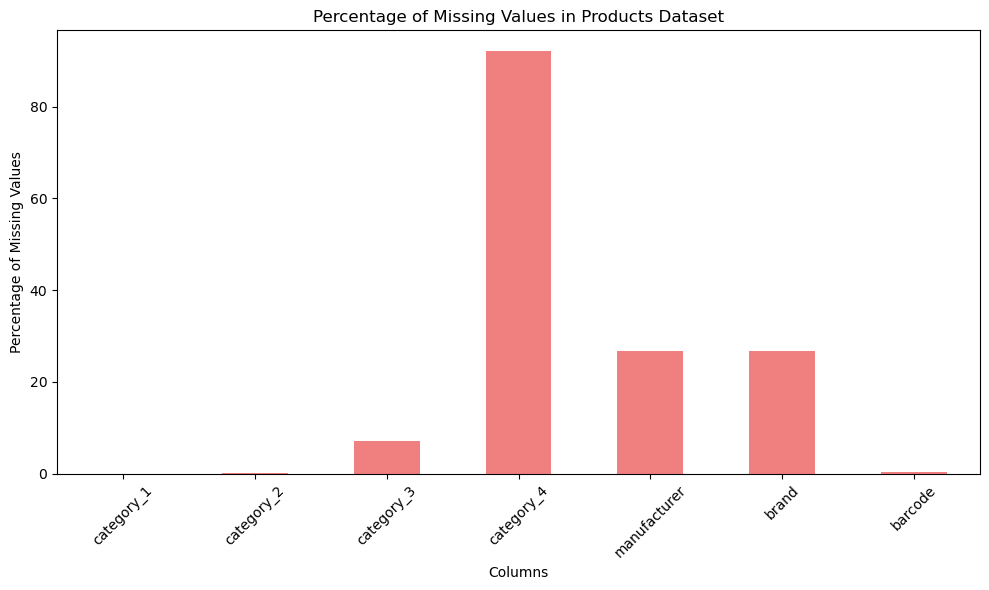

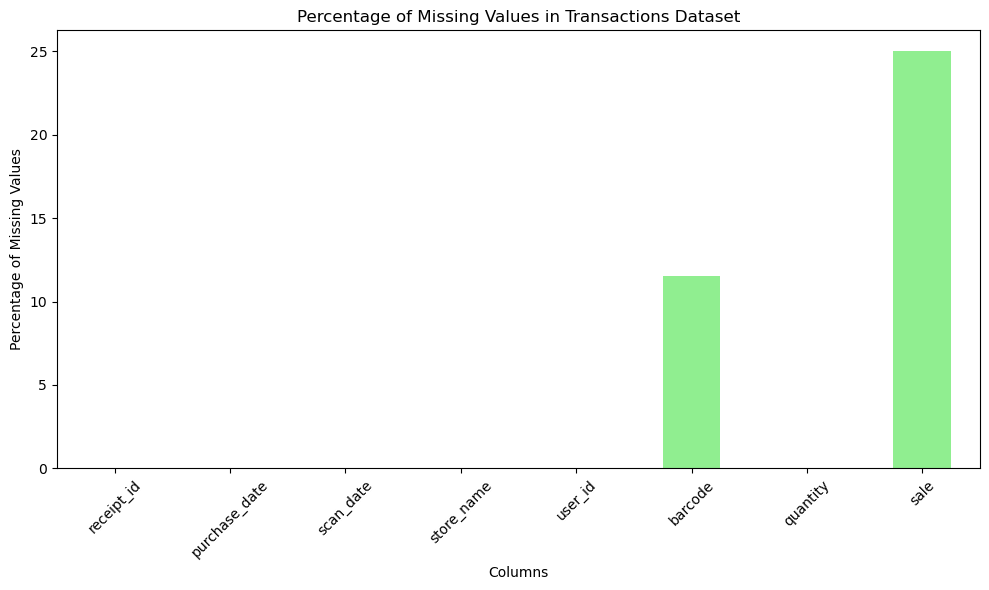

In [395]:
import matplotlib.pyplot as plt

# Total number of records in each dataset
users_row_count = users_df.shape[0]
products_row_count = products_df.shape[0]
transactions_row_count = transactions_df.shape[0]

# Checking for missing values in each column in the dataset
users_missing_values = users_df.isna().sum()
products_missing_values = products_df.isna().sum()
transactions_missing_values = transactions_df.isna().sum()

# Calculate the percentage of missing values in each column in the dataset
users_missing_percentage = (users_missing_values / users_row_count) * 100
products_missing_percentage = (products_missing_values / products_row_count) * 100
transactions_missing_percentage = (transactions_missing_values / transactions_row_count) * 100

# Displaying the results
print(f"Total Rows in Users DataFrame: {users_row_count}")
print("Missing values in Users DataFrame:")
print(users_missing_values)
print("Missing % in Users DataFrame:")
print(users_missing_percentage)

print(f"\nTotal Rows in Transactions DataFrame: {transactions_row_count}")
print("Missing values in Transactions DataFrame:")
print(transactions_missing_values)
print("Missing % in Transactions DataFrame:")
print(transactions_missing_percentage)

print(f"\nTotal Rows in Products DataFrame: {products_row_count}")
print("Missing values in Products DataFrame:")
print(products_missing_values)
print("Missing % in Products DataFrame:")
print(products_missing_percentage)



# Plotting the missing values percentage for Users dataset
plt.figure(figsize=(10, 6))
users_missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values in Users Dataset')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the missing values percentage for Products dataset
plt.figure(figsize=(10, 6))
products_missing_percentage.plot(kind='bar', color='lightcoral')
plt.title('Percentage of Missing Values in Products Dataset')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the missing values percentage for Transactions dataset
plt.figure(figsize=(10, 6))
transactions_missing_percentage.plot(kind='bar', color='lightgreen')
plt.title('Percentage of Missing Values in Transactions Dataset')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
# Check for Duplicates
# Check for duplicate rows
print("Duplicate rows in Users DataFrame:", users_df['id'].duplicated().sum())
print("Duplicate rows in Products DataFrame:", products_df.duplicated().sum())
print("Duplicate rows in Transactions DataFrame:", transactions_df.duplicated().sum())

Duplicate rows in Users DataFrame: 0
Duplicate rows in Products DataFrame: 215
Duplicate rows in Transactions DataFrame: 171


In [24]:
# Calculate the length of each ID and display the count of each unique length
id_lengths = users_df['id'].apply(len)

print("id length distribution:\n", id_lengths.value_counts())



id length distribution:
 id
24    100000
Name: count, dtype: int64


In [30]:
# Convert created_date to datetime format without timezone info
users_df['created_date'] = pd.to_datetime(users_df['created_date'], errors='coerce').dt.tz_localize(None)

# Filter for any future dates
future_dates = users_df[users_df['created_date'] > datetime.now()]
future_dates_count = future_dates.shape[0]  # Count of rows with future dates

# Check if any created_date values are timezone-aware
timezone_info = users_df['created_date'].apply(lambda x: x.tzinfo is not None)

# Count rows with timezone-aware created_date
timezone_aware_count = timezone_info.sum()

# Print values
print(f"Rows with future created_date: {future_dates_count}")
print(f"Rows with timezone-aware created_date: {timezone_aware_count}")


NameError: name 'datetime' is not defined

In [28]:
# Define minimum and maximum birth year
min_birth_year = today.year - 100  # Maximum age is 100 years
max_birth_year = today.year        # Minimum age is 0 years

# Filter for outliers in 'birth_date'
birth_date_outliers = users_df[
    (users_df['birth_date'].dt.year < min_birth_year) |
    (users_df['birth_date'].dt.year > max_birth_year)
]

invalid_birth_date_count = len(birth_date_outliers)
print("Number of records with invalid 'birth_date':", invalid_birth_date_count)


NameError: name 'today' is not defined

In [32]:
# Calculate the frequency of each birth date
birth_date_counts = users_df['birth_date'].value_counts()

# Find the 90th percentile of these frequencies
threshold = birth_date_counts.quantile(0.90)

# Filter for birth dates that are repeated above the 90th percentile
frequent_birth_dates = birth_date_counts[birth_date_counts > threshold].head(10)

# Display the result
print("Birth dates that are frequently repeated (above 90th percentile):")
print(frequent_birth_dates)


Birth dates that are frequently repeated (above 90th percentile):
birth_date
1970-01-01 00:00:00+00:00    1272
1979-12-11 08:00:00+00:00      63
2000-12-12 00:00:00+00:00      28
2000-12-31 00:00:00+00:00      23
2001-01-01 00:00:00+00:00      16
1999-12-31 00:00:00+00:00      15
1988-10-28 04:00:00+00:00      15
1999-12-12 00:00:00+00:00      14
2000-12-11 00:00:00+00:00      14
1990-01-01 00:00:00+00:00      14
Name: count, dtype: int64


In [34]:
# Expected gender values in the correct format
valid_genders = ['male', 'female', 'non-binary', "my gender isn't listed", 'prefer not to say']

# Check for values that don't match the exact expected format
incorrect_category_genders = users_df[~users_df['gender'].isin(valid_genders)]

# Display results
if not incorrect_category_genders.empty:
    print("Records with other categories in the gender field:\n", incorrect_category_genders['gender'].value_counts())

Records with other categories in the gender field:
 gender
transgender               1772
prefer_not_to_say         1350
non_binary                 473
unknown                    196
not_listed                 180
Non-Binary                  34
not_specified               28
My gender isn't listed       5
Prefer not to say            1
Name: count, dtype: int64


In [70]:
# Filter rows where 'sales' is missing
missing_sales_df = transactions_df[transactions_df['sale'].isna()]

# Check for missing values in other columns for these rows
missing_in_other_columns = missing_sales_df.isna().sum()

print(missing_in_other_columns)


receipt_id           0
purchase_date        0
scan_date            0
store_name           0
user_id              0
barcode           1457
quantity             0
sale             12500
dtype: int64


In [50]:
import pandas as pd

# Analyzing if other fields have data when BARCODE is missing in the products table
missing_barcode_data = products_df[products_df['barcode'].isna()].isna().sum()

# Displaying the result for missing values in rows where BARCODE is missing
missing_barcode_data


category_1         0
category_2       763
category_3      1852
category_4      3802
manufacturer     247
brand            247
barcode         4025
dtype: int64

In [188]:
# Calculate the mean and standard deviation of the birth year counts
mean_count = birth_year_counts.mean()
std_dev_count = birth_year_counts.std()

# Define a threshold for "frequently repeated" as counts greater than (mean + std deviation)
threshold = mean_count + std_dev_count

# Filter birth years with counts above the threshold
frequent_birth_years = birth_year_counts[birth_year_counts > threshold]

print("Birth years that are repeated frequently:")
print(frequent_birth_years)


Birth years that are repeated frequently:
birth_date
1970.0    2640
1979.0    1981
1980.0    3355
1981.0    2915
1982.0    3155
1983.0    2213
1984.0    1863
1985.0    1910
1986.0    1859
1987.0    1940
1988.0    2019
1989.0    1951
1990.0    2310
1991.0    2111
1992.0    1980
1994.0    1881
1995.0    1971
1998.0    1991
1999.0    2764
2000.0    5775
2001.0    2560
2002.0    2397
2003.0    2115
2004.0    1869
Name: count, dtype: int64


In [36]:
# Expected two-letter state codes (using US states as an example)
valid_state_codes = {
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
}

# Check for values that don't match the exact expected state codes and exclude null or empty values
incorrect_state_codes = users_df[~users_df['state'].isin(valid_state_codes) & 
users_df['state'].notna() & 
(users_df['state'] != '')]

# Display results
if not incorrect_state_codes.empty:
    print("Records with other categories in the state field:\n", incorrect_state_codes['state'].value_counts())
else:
    print("All state codes are valid.")


All state codes are valid.


In [455]:
# Count occurrences of each language, including both valid and invalid codes
language_counts = users_df['language'].value_counts()

print("Count of each language:")
print(language_counts)


Count of each language:
language
en        63403
es-419     6089
Name: count, dtype: int64


In [38]:
# Check for hierarchical consistency
# For each row, verify that if category_2 is present, category_1 should also be present,
# if category_3 is present, then category_1 and category_2 should also be present, etc.

# Identify rows where there are hierarchical inconsistencies
category_inconsistencies = products_df[
    (products_df['category_2'].notna() & products_df['category_1'].isna()) |
    (products_df['category_3'].notna() & (products_df['category_1'].isna() | products_df['category_2'].isna())) |
    (products_df['category_4'].notna() & (products_df['category_1'].isna() | products_df['category_2'].isna() | 
                                        products_df['category_3'].isna()))
]

# Display rows with hierarchical inconsistencies
print("Rows with hierarchical inconsistencies in categories:\n", category_inconsistencies)


Rows with hierarchical inconsistencies in categories:
 Empty DataFrame
Columns: [category_1, category_2, category_3, category_4, manufacturer, brand, barcode]
Index: []


In [40]:
# Count cases where brand is missing but manufacturer is present
missing_brand_with_manufacturer = products_df[products_df['brand'].isna() & products_df['manufacturer'].notna()].shape[0]

# Count cases where manufacturer is missing but brand is present
missing_manufacturer_with_brand = products_df[products_df['manufacturer'].isna() & products_df['brand'].notna()].shape[0]

# Display the results
print("Number of records where brand is missing but manufacturer is present:", missing_brand_with_manufacturer)
print("Number of records where manufacturer is missing but brand is present:", missing_manufacturer_with_brand)


Number of records where brand is missing but manufacturer is present: 0
Number of records where manufacturer is missing but brand is present: 2


In [42]:
# Ensure 'barcode' is treated as a string to calculate length, then count occurrences by length
barcode_lengths = products_df['barcode'].dropna().astype(str).apply(len)
barcode_length_counts = barcode_lengths.value_counts()

# Display the counts for each barcode length
print("Counts of each barcode length:\n", barcode_length_counts)


Counts of each barcode length:
 barcode
14    502091
13    296376
15     30144
12      7591
10      1907
11      1762
9        950
8        570
7         83
16        44
6          8
5          1
Name: count, dtype: int64


In [222]:
# Count the number of records with at least one missing value in any of the category fields
missing_category_count = products_df[['category_1', 'category_2', 'category_3', 'category_4']].isna().any(axis=1).sum()

print("Number of records with at least one missing value in category fields:", missing_category_count)


Number of records with at least one missing value in category fields: 778093


In [224]:
# List unique values in category_1 to check for inconsistencies
unique_category_1 = products_df['category_1'].str.strip().str.lower().unique()

print("Unique values in category_1:\n", unique_category_1)


Unique values in category_1:
 ['health & wellness' 'snacks' 'beverages' 'pantry' 'alcohol'
 'apparel & accessories' 'restaurant' 'needs review' 'dairy'
 'home & garden' nan 'household supplies' 'meat & seafood' 'deli & bakery'
 'sporting goods' 'produce' 'office & school' 'frozen'
 'arts & entertainment' 'animals & pet supplies' 'electronics' 'beauty'
 'toys & games' 'mature' 'vehicles & parts' 'baby & toddler'
 'luggage & bags' 'media']


In [44]:
# Calculate the length of each RECEIPT_ID
transactions_df['RECEIPT_ID_Length'] = transactions_df['receipt_id'].astype(str).apply(len)

# Group by length and count occurrences
length_counts = transactions_df.groupby('RECEIPT_ID_Length').size().reset_index(name='Count')

print("Count of RECEIPT_IDs by length:\n", length_counts)


Count of RECEIPT_IDs by length:
    RECEIPT_ID_Length  Count
0                 36  50000


In [46]:
# Standardize by stripping whitespace and converting to lowercase for consistency
products_df['brand'] = products_df['brand']
products_df['manufacturer'] = products_df['manufacturer']
# Count unique values for each field
unique_brand_count = products_df['brand'].nunique()
unique_manufacturer_count = products_df['manufacturer'].nunique()

# Display the counts
print("Number of unique brands:", unique_brand_count)
print("Number of unique manufacturers:", unique_manufacturer_count)


Number of unique brands: 8122
Number of unique manufacturers: 4354


In [48]:
# Convert scan_date and receipt_date columns to same format of date time
transactions_df['scan_date'] = pd.to_datetime(transactions_df['scan_date'], errors='coerce').dt.tz_localize(None)
transactions_df['purchase_date'] = pd.to_datetime(transactions_df['purchase_date'], errors='coerce').dt.tz_localize(None)

# Check if scan_date is after receipt_date
invalid_dates = transactions_df[transactions_df['scan_date'] < transactions_df['purchase_date']]

# Display count of rows with invalid dates
invalid_date_count = invalid_dates.shape[0]
print("Count of rows where scan_date is before purchase_date:", invalid_date_count)

Count of rows where scan_date is before purchase_date: 94


In [50]:
# Ensure quantity and sale are numeric
transactions_df['quantity'] = pd.to_numeric(transactions_df['quantity'], errors='coerce')
transactions_df['sale'] = pd.to_numeric(transactions_df['sale'], errors='coerce')

# Count records with numeric quantity, non-missing sales, and sales value is 0
zero_sales_count = transactions_df[
    (transactions_df['quantity'].notna()) & (transactions_df['quantity'] > 0) &
    (transactions_df['sale'].notna()) & (transactions_df['sale'] == 0)
].shape[0]

# Display the count
print("Count of records with numeric quantity but sales value is 0:", zero_sales_count)


Count of records with numeric quantity but sales value is 0: 321


In [471]:
# Ensure quantity is numeric
transactions_df['quantity'] = pd.to_numeric(transactions_df['quantity'], errors='coerce')

# Find records where quantity is negative or not a whole number
invalid_quantity_records = transactions_df[
    (transactions_df['quantity'] < 0) | 
    (transactions_df['quantity'] % 1 != 0)]

# Display count of records with invalid quantity
invalid_quantity_count = invalid_quantity_records.shape[0]
print("Count of records with invalid quantity (negative or non-whole number):", invalid_quantity_count)

Count of records with invalid quantity (negative or non-whole number): 110


In [356]:
# Find rows where the category_3 field is non-null and does not match the title-cased version
unformatted_category_3 = products_df[
    products_df['category_3'].notna() & 
    (products_df['category_3'] != products_df['category_3'].str.strip().str.title())
]

# Display the count and sample of unformatted category_1 values
print("Number of unformatted category_3 values (excluding nulls):", unformatted_category_3.shape[0])
print("Sample of unformatted category_3 values:")
print(unformatted_category_3['category_3'].head())

Number of unformatted category_3 values (excluding nulls): 12896
Sample of unformatted category_3 values:
7         Men's Deodorant & Antiperspirant
18        Men's Deodorant & Antiperspirant
99     Foot Care Devices and Grooming Aids
117    Foot Care Devices and Grooming Aids
166       Men's Deodorant & Antiperspirant
Name: category_3, dtype: object


In [358]:
# Find rows where the category_4 field is non-null and does not match the title-cased version
unformatted_category_4 = products_df[
    products_df['category_4'].notna() & 
    (products_df['category_4'] != products_df['category_4'].str.strip().str.title())
]

# Display the count and sample of unformatted category_1 values
print("Number of unformatted category_4 values (excluding nulls):", unformatted_category_4.shape[0])
print("Sample of unformatted category_4 values:")
print(unformatted_category_4['category_4'].head())

Number of unformatted category_4 values (excluding nulls): 9708
Sample of unformatted category_4 values:
25     Women's Shaving Gel & Cream
44     Women's Shaving Gel & Cream
82     Women's Shaving Gel & Cream
109                   Men's Razors
162    Women's Shaving Gel & Cream
Name: category_4, dtype: object


In [52]:
# Find rows where the store_name field is non-null and does not match the title-cased version
unformatted_store_name = transactions_df[
    transactions_df['store_name'].notna() & 
    (transactions_df['store_name'] != transactions_df['store_name'].str.strip().str.upper())
]

# Display the count and sample of unformatted category_1 values
print("Number of unformatted store_name values (excluding nulls):", unformatted_store_name.shape[0])
print("Sample of unformatted store_name values:")
print(unformatted_store_name['store_name'].head())

Number of unformatted store_name values (excluding nulls): 2
Sample of unformatted store_name values:
13649    TINKER COMMISsARY
45075    TINKER COMMISsARY
Name: store_name, dtype: object


In [477]:
# Find rows where the Brand field is non-null and does not match the title-cased version
unformatted_brands = products_df[
    products_df['brand'].notna() & 
    (products_df['brand'] != products_df['brand'].str.strip().str.upper())
]

# Display the count and sample of unformatted Brand values
print("Number of unformatted Brand values (excluding nulls):", unformatted_brands.shape[0])
print("Sample of unformatted Brand values:")
print(unformatted_brands['brand'].head())



Number of unformatted Brand values (excluding nulls): 3
Sample of unformatted Brand values:
298995    Listerine
315241    Listerine
553728    Kellogg's
Name: brand, dtype: object


In [54]:
# Find rows where the manufacturer field is non-null and does not match the title-cased version
unformatted_manufacturer = products_df[
    products_df['manufacturer'].notna() & 
    (products_df['manufacturer'] != products_df['manufacturer'].str.strip().str.upper())
]

# Display the count and sample of unformatted category_1 values
print("Number of unformatted manufacturer values (excluding nulls):", unformatted_manufacturer.shape[0])
print("Sample of unformatted manufacturer values:")
print(unformatted_manufacturer['manufacturer'].head())

Number of unformatted manufacturer values (excluding nulls): 0
Sample of unformatted manufacturer values:
Series([], Name: manufacturer, dtype: object)


In [352]:
# Find rows where the category_1 field is non-null and does not match the title-cased version
unformatted_category_1 = products_df[
    products_df['category_1'].notna() & 
    (products_df['category_1'] != products_df['category_1'].str.strip().str.title())
]

# Display the count and sample of unformatted category_1 values
print("Number of unformatted category_1 values (excluding nulls):", unformatted_category_1.shape[0])
print("Sample of unformatted category_1 values:")
print(unformatted_category_1['category_1'].head())

Number of unformatted category_1 values (excluding nulls): 0
Sample of unformatted category_1 values:
Series([], Name: category_1, dtype: object)


In [56]:
# Find rows where the category_2 field is non-null and does not match the title-cased version
unformatted_category_2 = products_df[
    products_df['category_2'].notna() & 
    (products_df['category_2'] != products_df['category_2'].str.strip().str.title())
]

# Display the count and sample of unformatted category_1 values
print("Number of unformatted category_2 values (excluding nulls):", unformatted_category_2.shape[0])
print("Sample of unformatted category_2 values:")
print(unformatted_category_2['category_2'].head())

Number of unformatted category_2 values (excluding nulls): 0
Sample of unformatted category_2 values:
Series([], Name: category_2, dtype: object)
